In [2]:
import msprime
import numpy as np
import sys
from IPython.display import SVG
%load_ext rpy2.ipython
# %reload_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
%%R

tab <- tibble()
for (sim in 1:20) {
    for (rho in c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5')) {
        for (tht in c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5')) {
            tab <- read_csv(paste0('../steps/01_msprime_simulations/sim', sim, '_rho', rho, '_tht', tht, '.csv'),
                           show_col_types = FALSE) %>%
                mutate(
                    sim = sim,
                    rho = rho,
                    tht = tht
                ) %>%
                bind_rows(tab)
        }
    }
}

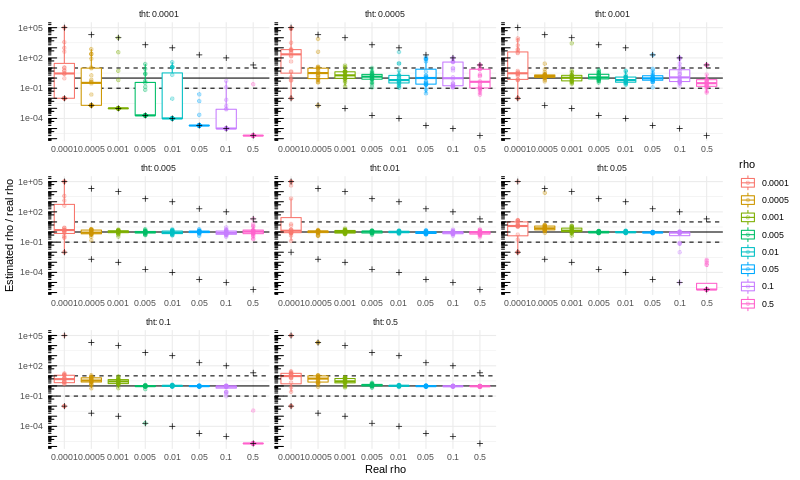

In [4]:
%%R -w 800

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    ungroup() %>%
    ggplot() +
    geom_hline(aes(yintercept = 1)) +
    # geom_hline(aes(yintercept = y), data = tibble(y=c(0.5, 2))) +
    geom_hline(aes(yintercept = y), linetype = 2, data = tibble(y=c(0.1, 10))) +
    geom_boxplot(aes(
        rho, 
        par1/as.numeric(rho),
        color = rho),
        outlier.shape = NA) +
    geom_point(aes(
        rho, 
        par1/as.numeric(rho),
        color = rho), 
        alpha = 0.3) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 0.000001/as.numeric(x))) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 10/as.numeric(x))) +
    facet_wrap(~tht, scales = 'free_x', labeller = label_both) +
    scale_y_log10() +
    annotation_logticks(sides = 'l') +
    theme_minimal() +
    ylab('Estimated rho / real rho') +
    xlab('Real rho')

The above plots show the estimated rho relative to the real rho used in the simulations for different values of theta. The continuous horizontal line intersects at 1, and dashed lines represent a 10-fold increase or decrease in the relative rho. Crosses represent the upper and lower limits of the optimization.

We can see that, when theta is small, rho is greately underestimated, and it appears to be snapped to the minimum value. This might be because there are not enough mutations to fir the model correctly. In more intermediate theta values (0.001-0.01), the rho values are estimated correctly.

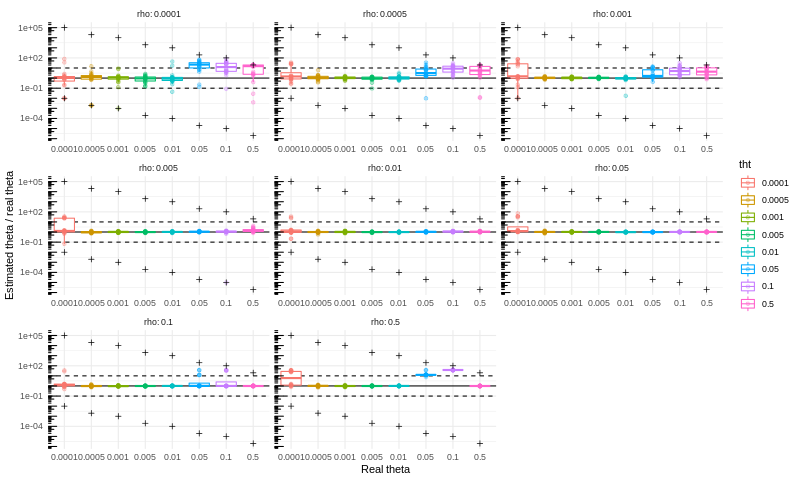

In [5]:
%%R -w 800

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    ungroup() %>%
    ggplot() +
    geom_hline(aes(yintercept = 1)) +
    geom_hline(aes(yintercept = y), linetype = 2, data = tibble(y=c(0.1, 10))) +
    geom_boxplot(aes(tht, 
                   par2/as.numeric(tht),
                   color = tht),
                 outlier.shape = NA) +
    geom_point(aes(tht, 
                   par2/as.numeric(tht),
                   color = tht), 
        alpha = 0.3) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 0.000001/as.numeric(x))) +
    geom_point(aes(x, y), shape = 3,
               data = 
               tibble(
                   x = c('0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5'),
                   y = 10/as.numeric(x))) +
    facet_wrap(~rho, scales = 'free_x', labeller = label_both) +
    scale_y_log10() +
    annotation_logticks(sides = 'l') +
    theme_minimal()+
    ylab('Estimated theta / real theta') +
    xlab('Real theta')

The above plots show the estimated theta relative to the real theta used in the simulations for different values of rho. The continuous horizontal line intersects at 1, and dashed lines represent a 10-fold increase or decrease in the relative theta. Crosses represent the upper and lower limits of the optimization.

Theta is generally well estimated for low to intermediate values (0.0001-0.01). For small values of 

In [6]:
%%R

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step))

# A tibble: 1,280 × 9
# Groups:   sim, rho, tht [1,280]
    step      par1      par2     fn           gr1        gr2   sim rho   tht   
   <dbl>     <dbl>     <dbl>  <dbl>         <dbl>      <dbl> <int> <chr> <chr> 
 1    42  0.484    0.497     58534.   -0.00721      0.00486     20 0.5   0.5   
 2    11  0.000001 3.86      30727. 2414.          -0.000149    20 0.5   0.1   
 3    25  0.000667 0.629     18985.   -0.000923     0.000311    20 0.5   0.05  
 4    23  0.213    0.00957    5329.   -0.000382    -0.0971      20 0.5   0.01  
 5    20  0.222    0.00503    3148.   -0.00000949  -0.324       20 0.5   0.005 
 6    47 10        0.000804    653.   -0.00241    -86.5         20 0.5   0.001 
 7    42  9.22     0.000576    486.   -0.00124    -20.5         20 0.5   0.0005
 8    42  0.000001 0.0000974   134. 4468.         291.          20 0.5   0.0001
 9    29  0.0963   0.508     54381.   -0.256        0.0692      20 0.1   0.5   
10    27  0.0853   0.0984    28408.   -0.00890      0.00254     

In [12]:
%%R

tab %>%
    group_by(sim, rho, tht) %>%
    filter(step == which.max(step)) %>%
    group_by(rho, tht) %>%
    summarize(
        median_rho_estimated = median(par1),
        median_tht_estimated = median(par2)) %>%
    select(rho_real = rho, median_rho_estimated,
           tht_real = tht, median_tht_estimated) %>%
    print(n = 64)
           
    

`summarise()` has grouped output by 'rho'. You can override using the `.groups` argument.
# A tibble: 64 × 4
# Groups:   rho_real [8]
   rho_real median_rho_estimated tht_real median_tht_estimated
   <chr>                   <dbl> <chr>                   <dbl>
 1 0.0001               0.000286 0.0001               0.000104
 2 0.0001               0.0242   0.0005               0.000651
 3 0.0001               0.000301 0.001                0.00113 
 4 0.0001               0.000156 0.005                0.00467 
 5 0.0001               0.000135 0.01                 0.00887 
 6 0.0001               0.000397 0.05                 1.09    
 7 0.0001               0.000475 0.1                  1.40    
 8 0.0001               0.000975 0.5                  7.64    
 9 0.0005               0.000170 0.0001               0.000144
10 0.0005               0.00157  0.0005               0.000530
11 0.0005               0.000815 0.001                0.00103 
12 0.0005               0.000439 0.005         